In [1]:
# Import packages
require(ks)
require(hdrcde)
require(mixtools)

# Define Durham purple colour variable
durham_purple = "#68246d90"

Loading required package: ks

Loading required package: hdrcde

This is hdrcde 3.4

Loading required package: mixtools

mixtools package, version 1.2.0, Released 2020-02-05
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772.





**Introduction** 

We consider a data set known  as  the "faithful geyser data".  This is a data frame with 272 observations giving the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.
Please use the following code to read the data in and display a scatterplot: 


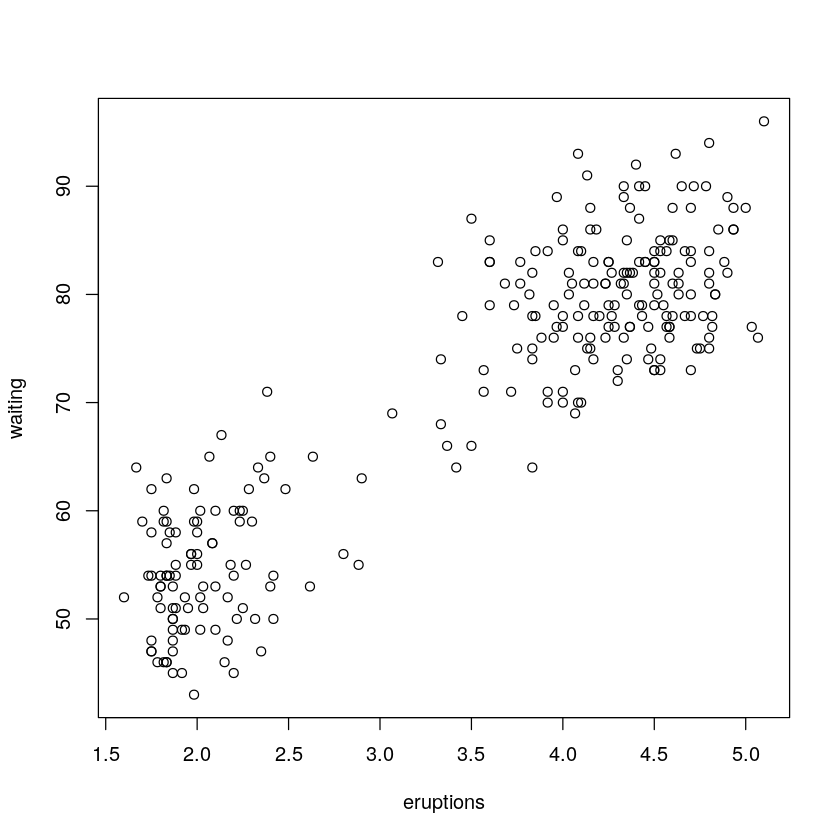

In [2]:
data(faithful)
plot(faithful)

In [3]:
head(faithful)

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55


 **Question 1** (6 marks)
 
 Compute the sample variance matrix as well as the correlation matrix of this data frame.

In [4]:
sigma <- cov(faithful)  # Compute sample variance matrix
R <- cor(faithful)  # Compute sample correlation matrix

print("Covariance matrix:")
sigma

print("Correlation matrix:")
R

[1] "Covariance matrix:"


,eruptions,waiting
eruptions,1.302728,13.97781
waiting,13.977808,184.82331


[1] "Correlation matrix:"


,eruptions,waiting
eruptions,1.0000000,0.9008112
waiting,0.9008112,1.0000000


**Question 2** (6 marks)

Interpret briefly the results from the previous question, with reference to the previously displayed scatterplot. 

The diagonal elements of the covariance matrix are the variances of the given column, ie "eruptions" has variance ~1.30 and waiting has variance ~185. The off-diagonal elements are identical and equal to the covariance between the two variables: $ E(eruptions \times waiting) - E(eruptions)E(waiting)$. This gives a measure of the joint variability of the two columns - the absolute number is not capped however we can see from the fact that the number is positive that the two columns vary together.
<br><br>
The correlation matrix tells us how correlated the two columns are. It is standardised as 1 down the diagonal as each column should be 100% correlated with itself. The off diagonal elements are identical and equal to the correlation of the two columns. This value is ~0.901 indicating a strong positive correlation between the two columns. This can be seen in the scatter plot as the data points show a strong positive linear correlation. <br><br>(note that this actually appears to be two different clusters, just with one centred at a greater value for both columns).

**Question 3** (2 marks)

Produce a histogram of the variable `eruptions`.


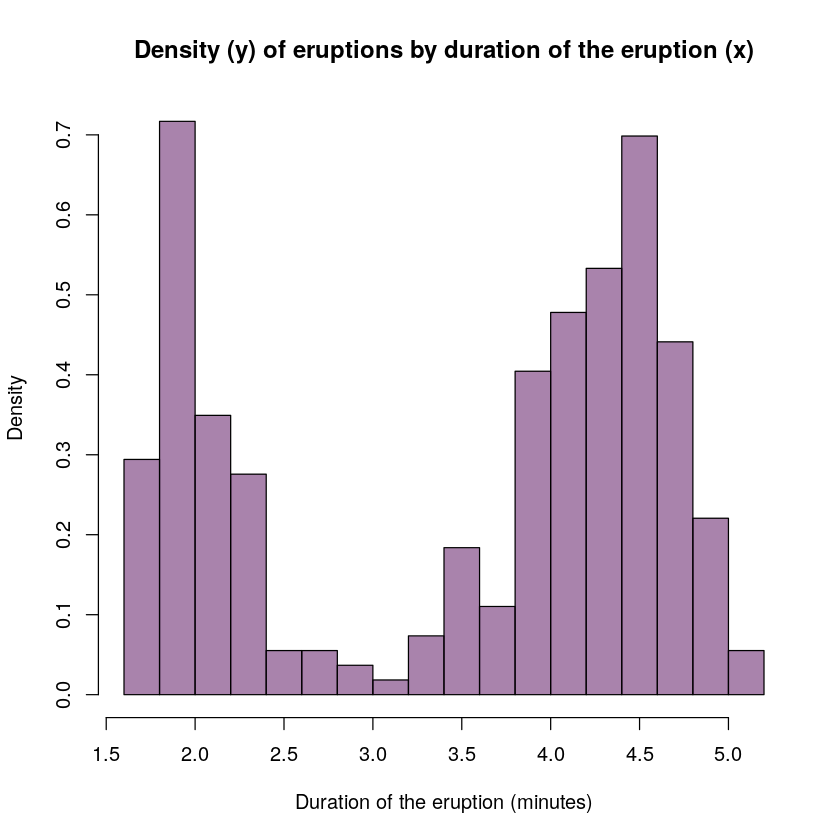

In [5]:
hist(
    faithful$eruptions,
    breaks = 20,
    col = durham_purple,
    main = "Density (y) of eruptions by duration of the eruption (x)",
    xlab = "Duration of the eruption (minutes)",
    prob=TRUE
)

**Question 4** (8 marks)

Now produce a histogram of the `waiting` variable, graphically overlaying a kernel density estimate of this variable.

In order to obtain the kernel density estimate, use R function `density` with its default options.


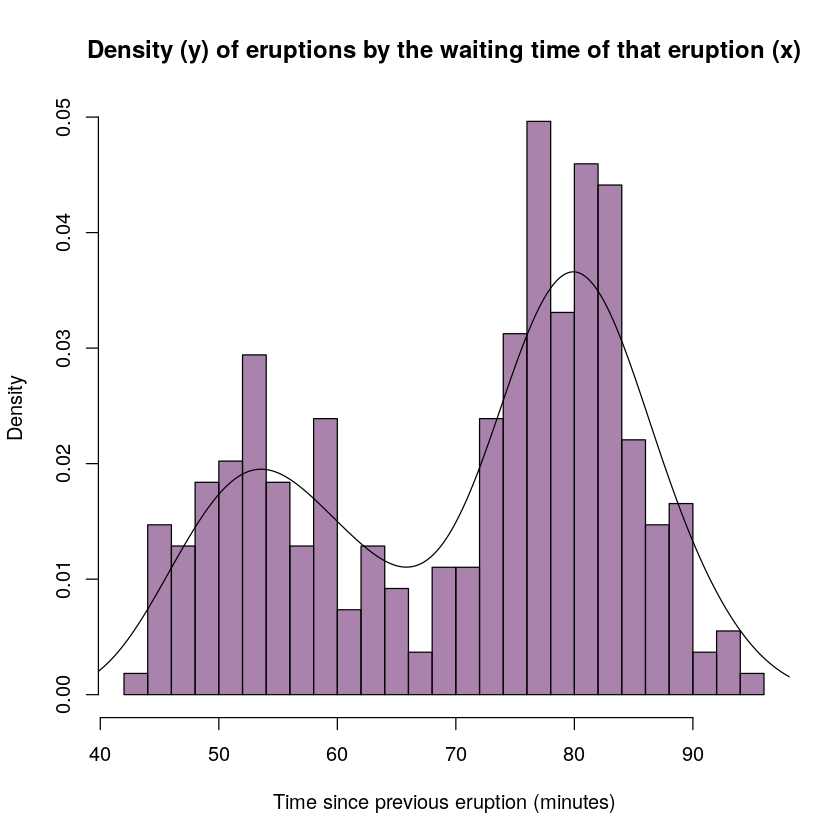

In [6]:
# Plot the histogram
hist(
    faithful$waiting,
    breaks = 20,
    col = durham_purple,
    main = "Density (y) of eruptions by the waiting time of that eruption (x)",
    xlab = "Time since previous eruption (minutes)",
    prob=TRUE
)

# Plot the density
lines(density(faithful$waiting))

**Question 5** (8 marks)

Use function `kde` (with default options) from R package `ks` in order to estimate the density of the bivariate data frame `faithful`.  Visualize the estimated density through a perspective plot.


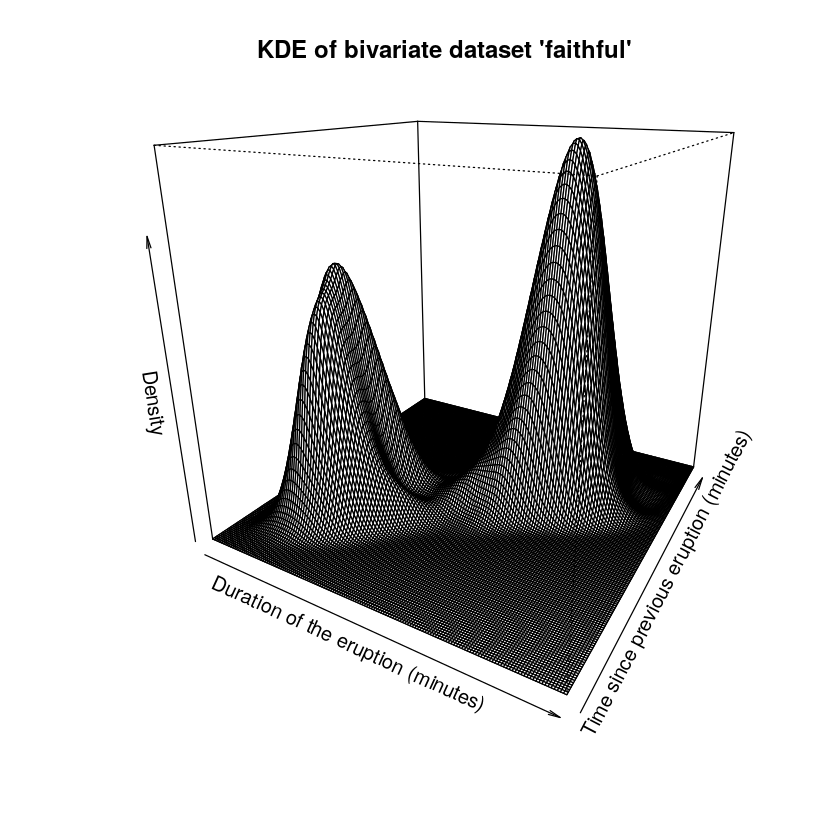

In [7]:
# Estimate density of "faithful" dataset
faithful.kde <- kde(faithful)

# Plot perspective plot of the estimated density
persp(
    faithful.kde$estimate,
    theta = 30,
    phi = 20,
    xlab = "Duration of the eruption (minutes)",
    ylab = "Time since previous eruption (minutes)",
    zlab = "Density",
    main = "KDE of bivariate dataset 'faithful'"
)

**Question 6** (12 marks)

Next we would like to implement a routine for automated bandwidth selection. 
For bivariate data (as here), it has been suggested in the literature to use the simple rule of thumb

$h_j= s_j n^{-1/6}$

where $s_j$ is the sample standard deviation of the j-th variable, and $n$ the sample size. Produce a function which implements this rule, and use it to compute the resulting bandwidths $h_1$  and $h_2$.   From this, produce a bandwidth matrix 

$H= \left(\begin{array}{cc} h_1^2 & 0\\ 0 & h_2^2 \end{array}\right)$,

and save it into an object `H`.


In [8]:
auto_band_select <- function(data){
    
    p <- ncol(data)  # Get number of columns of the data
    n <- nrow(data)  # Get number of rows of the data
    H <- matrix(0, p, p)  # Initialise a matrix of zeros of size p x p
    
    for(j in 1:p){  # Iterate over each column
        stddev <- sd(data[, j])  # calculate sample standard deviation of column "j"
        h <- stddev * (n**(-1/6))  # Multiply by n raised to the power of -1/6, this gives the bandwidth, h of the column
        H[j, j] <- h**2  # Square h and insert it into the bandwidth matrix, H.
    }
    
    return(H)
}

H <- auto_band_select(faithful)
H

0.2010624,0.00000
0.0000000,28.52553


**Question 7** (10 marks)


Using the bandwidth matrix `H` in `kde`,  compute again the kernel density estimate of the `faithful` data.  Then produce two contourplots, with the first one showing the density estimate from Question 5, and the second one showing the density estimate from this question. Each plot should also display the original data points, and the axes of both plots should have the same ranges.



In [9]:
# Computing the KDE of the faithful data using the bandwidth matrix
faithful.kde2 <- kde(faithful, H=H)

# Params to ensure graphs are similar
xrange <- c(1, 5.75)
yrange <- c(35, 100)
contours <- 20

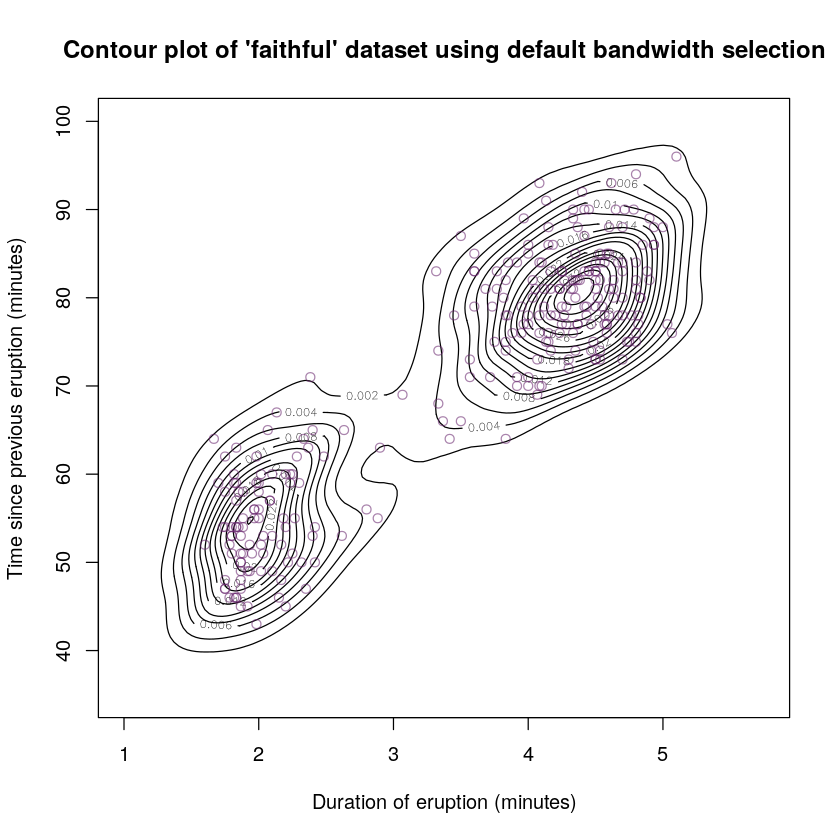

In [10]:
# KDE CONTOUR PLOT WITHOUT USING H

contour(  # Plot the contour plot
    x = faithful.kde$eval.points[[1]],
    y = faithful.kde$eval.points[[2]],
    z = faithful.kde$estimate,
    xlim = xrange,
    ylim = yrange,
    nlevels = contours,
    ylab = "Time since previous eruption (minutes)",
    xlab = "Duration of eruption (minutes)",
    main = "Contour plot of 'faithful' dataset using default bandwidth selection"
)

points(  # Add the data points
    faithful.kde$x[,1],
    faithful.kde$x[,2],
    col = durham_purple
)

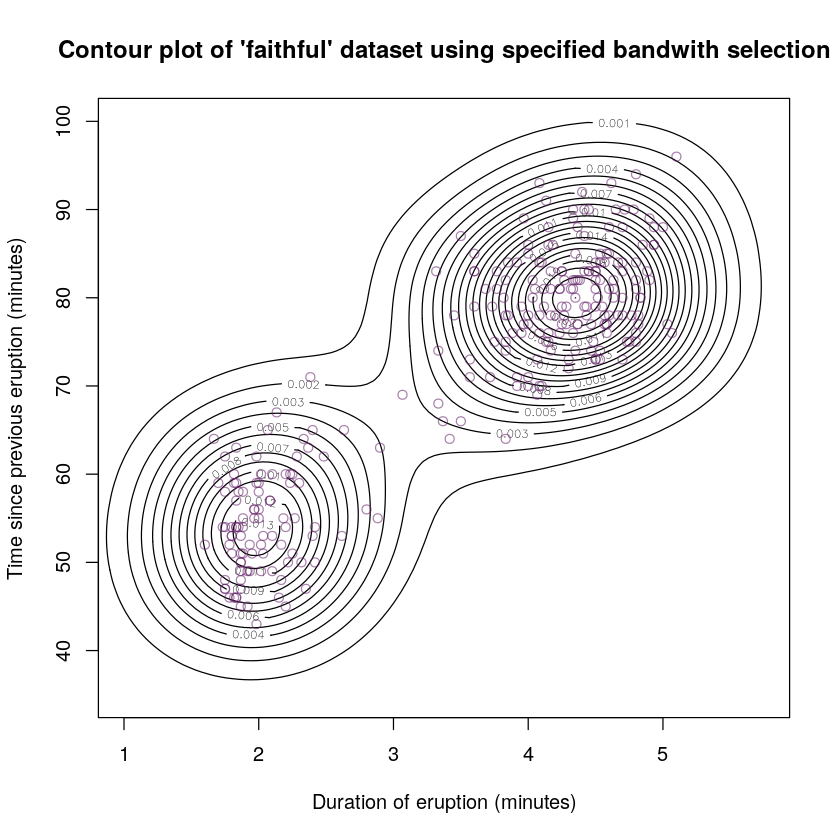

In [11]:
# KDE CONTOUR PLOT USING H

contour(  # Plot the contour plot
    x = faithful.kde2$eval.points[[1]],
    y = faithful.kde2$eval.points[[2]],
    z = faithful.kde2$estimate,
    xlim = xrange,
    ylim = yrange,
    nlevels = contours,
    ylab = "Time since previous eruption (minutes)",
    xlab = "Duration of eruption (minutes)",
    main = "Contour plot of 'faithful' dataset using specified bandwith selection"
)

points(  # Add the data points
    faithful.kde2$x[,1],
    faithful.kde2$x[,2],
    col = durham_purple
)

**Question 8** (6 marks)

Describe briefly what you see in the two plots: In which aspects are the two estimated densities different?

Both plots show the contour lines wrap around two distinct cluster centres. The first plot is using the default value for bandwidth which is smaller and has resulted in an undersmoothed density estimation. This is visible in the contour plot which closely wraps around the data points. In the second plot, the bandwidth matrix is used which has resulted in a much smoother density estimation. This is clear in the contour plot as the density forms quite circular contour lines around the cluster centres. In the second plot, the density estimation may be too smooth and thus a different bandwidth selection method which provides slightly smaller values for the bandwidth matrix may work better.

**Question 9** (12 marks)

Using again the bandwidths obtained in Question 6, compute and visualize a high-density region (HDR) 

$
{\cal L}(c)= \{ \boldsymbol{x} |\hat{f}(\boldsymbol{x})>c \}.
$

so that the integral

$\int_{ {\cal L}(c)}\hat{f}(\boldsymbol{x}) d \boldsymbol{x}$

is equal to 0.6. Your plot should also display the original data.



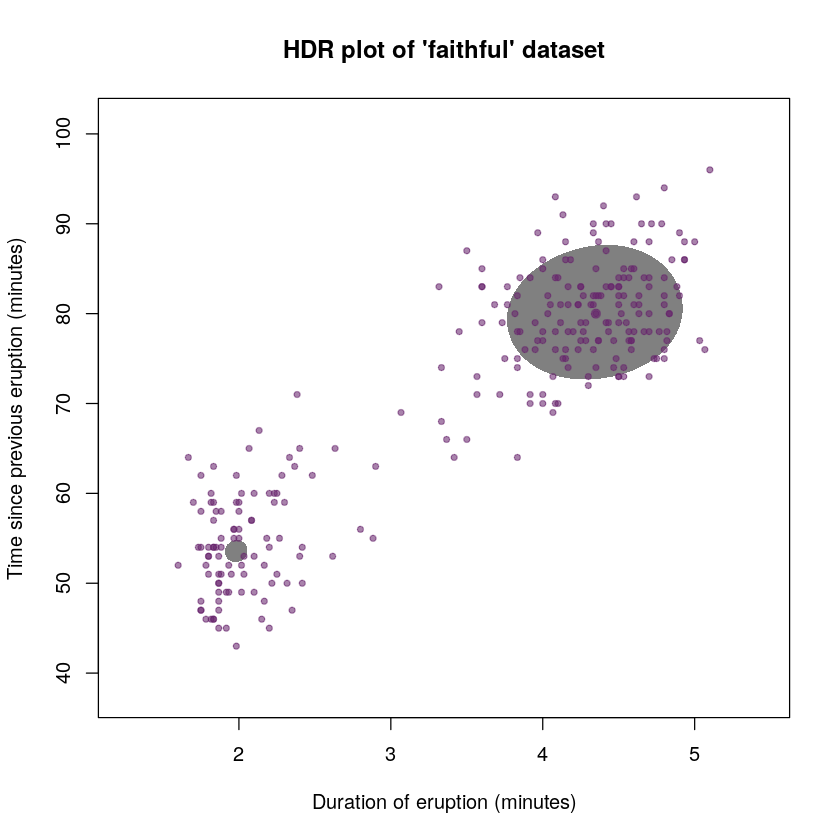

In [12]:
# Calculate high density region
faithful.hdr <- hdr.2d(
    faithful$eruptions,
    faithful$waiting,
    prob=0.4,
    kde.package="ks",
    h=diag(H)
)

# Plot HDR
plot(
    faithful.hdr,
    show.points = TRUE,
    pointcol = durham_purple,
    xlab = "Duration of eruption (minutes)",
    ylab = "Time since previous eruption (minutes)",
    main = "HDR plot of 'faithful' dataset"
)

**Question 10** (7 marks)

Give a short critical assessment of the usefulness of the concept of high-density regions for clustering purposes.

High density regions can be used to give an indication of the region where data is most concentrated, however their use for defining clusters is limited. High density regions can be especially useful in determining the distribution of the data, as it does not make assumptions about the distribution, ie if it is Gaussian or not. High density regions struggle to act as classifiers for specific clusters though - this is because each data point cannot be automatically associated with a cluster centre. The choice of threshold for C is also somewhat arbitrary, and variation in this value is a variation in what we would define as dense enough to constitute a cluster. Also, as density-based clustering measures euclidean space, it is inefficient for high-dimensional data. High density regions also compare the density of each cluster to the total dataset, rather than points which belong to that cluster, so high density regions of smaller clusters may go underrepresented. This can be seen in the HDR plot above, where the smaller cluster has a very small HDR due to most of the data points belonging to the bigger cluster.

**Question 11** (12 marks)

Using the functionmvnormalmixEMfrom the R package `mixtools` fit a Gaussian mixture model to the data frame `faithful`.  Assign the outcome to an object `mixmodel`.  Choose an appropriate number of mixture components `k` based on previous observations.  Finally, show a scatter plot of the fitted model with density contours of your choosing.  (You can consult `?plot.mixEM` to learn about the plotting options.) Set a seed to ensure reproducible results.

In [13]:
set.seed(42)  # Set seed to ensure reproducibility

# Fit Gaussian model to the "faithful" dataset, with 2 mixture components
mixmodel <- mvnormalmixEM(faithful, k=2)

number of iterations= 22 


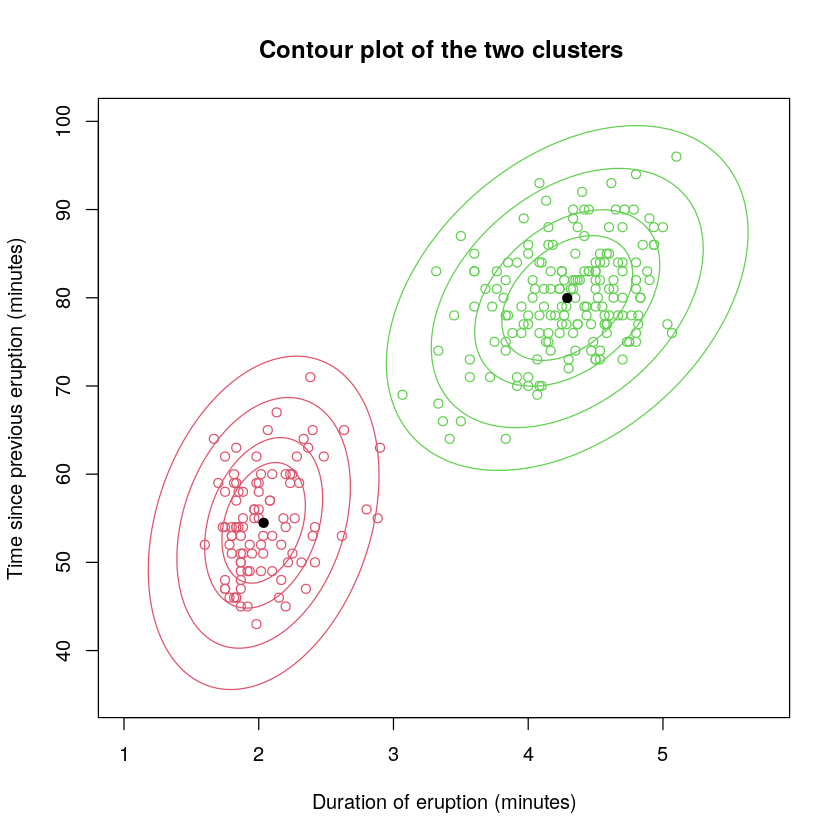

In [14]:
# Define desired contour lines
conts <- c(0.005,  # Plot a contour to contain 99.5% of all data
           0.05,   # Plot a contour to contain 95% of all data
           0.25,   # Plot a contour to contain 75% of all data
           0.5)    # Plot a contour to contain 50% of all data

# Contour plot of model density
plot(
    x = mixmodel,
    whichplots = 2,  # Creates density plot rather than loglik plot
    xlim = xrange,
    ylim = yrange,
    alpha = conts,
    xlab2 = "Duration of eruption (minutes)",
    ylab2 = "Time since previous eruption (minutes)",
    main2 = "Contour plot of the two clusters "
)

**Question 12** (3 marks)

Use the fitted mixture model to assign every data point of the data frame `faithful` to one of the `k` clusters. Print the number of class members for each of the `k` classes.

In [15]:
classifier <- function(k, data){

    rows <- nrow(data)  # Get number of rows in dataset
    mixmodel <- mvnormalmixEM(faithful, k=k)  # Fit Gaussian to given data with k mixture components
    w <- mixmodel$posterior  # Get matrix of cluster probabilities
    data$class <- matrix(0, rows, 1)  # Add a column of zeros to data to modify with class of each row

    for(i in 1:rows){  # Iterate over the rows
        if( w[i, 1] > w[i, 2] ){  # If probability of being in cluster 1 is greater than probability of being in cluster 2
            data$class[i] <- "Class 1"  # then write "Class 1" to new "class" column
        } else{
            data$class[i] <- "Class 2"  # otherwise write "Class 2" to new "class" column
        }
    }
    
    return(data)  # Return the dataset now containing the new column with the rows classified into classes
}

faithful2 <- classifier(2, faithful)  # Run above program on our data
classes <- table(faithful2$class)  # Use table function to summarise count of each class
classes

number of iterations= 14 



Class 1 Class 2 
     97     175 

**Question 13** (8 marks)

An important aspect of Gaussian mixture models is that it is a _generative model_ meaning we can use it to create new data by sampling from the model. Write an `R` function `sample_gmm` that takes arguments `size, prop, mus, sigmas` for the number of samples, the mixing probabilities, as well as the means vectors and covariance matrices. 

Return 100 new samples from the Gaussian mixture model and print them to a scatter plot. 

(Hint: you can sample from a multivariate Gaussian distribution using the function `rmvnorm` from the `mixtools` package.)

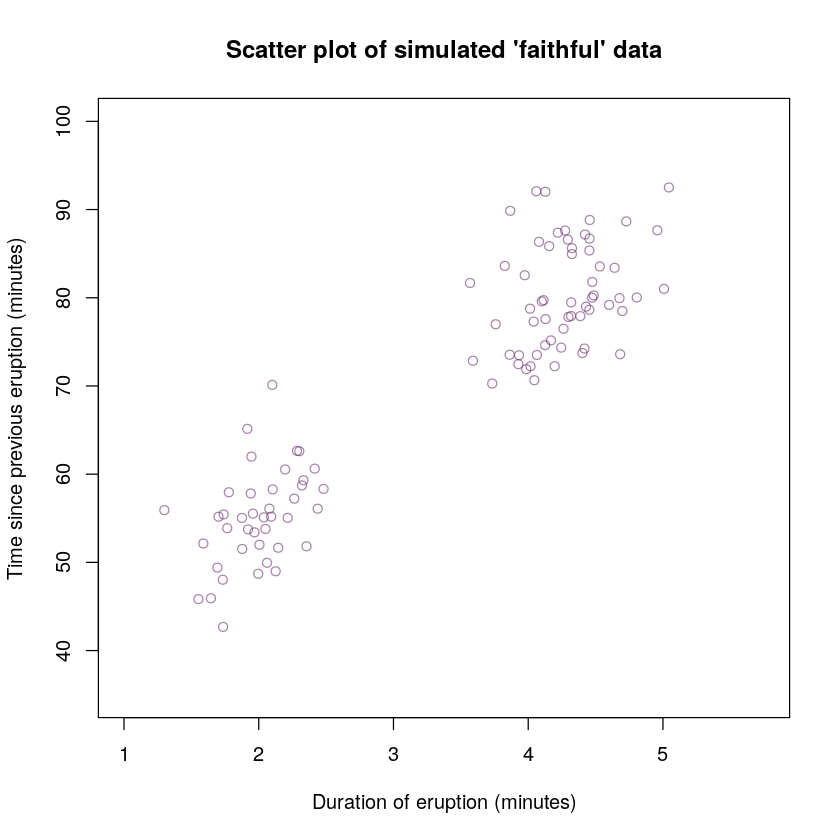

In [16]:
set.seed(42)  # Set seed for reproducibility

sample_gmm <- function(size, prop, mus, sigmas){
    
    sigmas <- do.call(rbind, sigmas)  # Get sigmas in form required by rmvnorm.mixt function
    mus <- do.call(rbind, mus)  # Get mus in form required by rmvnorm.mixt function
    
    return( rmvnorm.mixt(n=size, mus=mus, Sigmas=sigmas, props=prop) )
}

# Simulate "n" data points using function above
faithful_sim <- sample_gmm(size=100, prop=mixmodel$lambda, mus=mixmodel$mu, sigmas=mixmodel$sigma)

# Plot the "n" simulated data points on a scatter plot
plot(
    faithful_sim,
    xlab = "Duration of eruption (minutes)",
    ylab = "Time since previous eruption (minutes)",
    main = "Scatter plot of simulated 'faithful' data",
    xlim = xrange,
    ylim = yrange,
    col = durham_purple
)